# **Heart Disease Predictive Model**

**Additional Information**

Name: Keirsten Cheatham

Dataset by Heart Disease UCI
## Dataset Column Description:
* age: in years
* sex: (1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol:
serum cholesterol in mg/dl
* fbs:
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg:
resting electrocardiographic results
* thalach:
maximum heart rate achieved
* exang:
exercise induced angina (1 = yes; 0 = no)
* oldpeak:
ST depression induced by exercise relative to rest
* slope:
the slope of the peak exercise ST segment
* ca:
number of major vessels (0-3) colored by flourosopy
* thal:
 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:
1 or 0 (we will convert into binary 0 means no heart disease and 1 means heart disease)

#### Dataset source:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#### Context:
<font color='blue'>**This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to
 this date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).**
</font>


In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from tqdm import tqdm


import warnings
warnings.filterwarnings('ignore')

In [2]:
# let try to load the data
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv("processed.cleveland.data", names = names)

# Exploratory Data Analysis

In [3]:
# lets try to look the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
print("Total Rows:", df.shape[0]) # check the shape of dataset
print("Total Columns:", df.shape[1])

Total Rows: 303
Total Columns: 14


In [5]:
print("Features: {}".format(df.columns.tolist())) # check the columns names inside the dataset

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
print("Any Duplicated Values: {}".format(df.duplicated().any())) # check duplicated values

Any Duplicated Values: False


* Duplicated values not exist in dataset

In [7]:
df.info() # check general information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
# Create an empty DataFrame to store the unique values
unique_values_df = pd.DataFrame(columns=['Feature', 'Unique Values'])

# Iterate through each column in the DataFrame
for column in df.columns:
    # Get the unique values in the column
    unique_values = df[column].unique()

    # Create a string representation of the unique values
    unique_values_str = ', '.join(map(str, unique_values))

    # Append the feature name and unique values to the DataFrame
    unique_values_df = unique_values_df.append({'Feature': column, 'Unique Values': unique_values_str}, ignore_index=True)

unique_values_df

,Feature,Unique Values
0,age,"63.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 53.0..."
1,sex,"1.0, 0.0"
2,cp,"1.0, 4.0, 3.0, 2.0"
3,trestbps,"145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150...."
4,chol,"233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268...."
5,fbs,"1.0, 0.0"
6,restecg,"2.0, 0.0, 1.0"
7,thalach,"150.0, 108.0, 129.0, 187.0, 172.0, 178.0, 160...."
8,exang,"0.0, 1.0"
9,oldpeak,"2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0..."


* After analyzing the dataset, we have identified that the "ca" and "thal" features contain missing values represented by "?". It is important to handle these missing values appropriately

In [9]:
# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

In [10]:
df['thal'].dtype, df['ca'].dtype

(dtype('O'), dtype('O'))

* To change the data type of the "thal" and "ca" columns from object (dtype('O')) to integer (dtype('float')), we can use the astype() method in pandas.

In [11]:
# Convert 'thal' column to float
df['thal'] = df['thal'].astype(float)

# Convert 'ca' column to float
df['ca'] = df['ca'].astype(float)

In [12]:
df['thal'].dtype, df['ca'].dtype

(dtype('float64'), dtype('float64'))

In [13]:
# Replace Inf values with NaN if any
df = df.replace([np.inf, -np.inf], np.nan)

In [14]:
missing = (df.isnull().mean())>0
missing_values_features = (df.isnull().sum())[missing]

In [15]:
missing_values_features = missing_values_features.reset_index().sort_values(by=0,ascending=False).round(2).rename({'index':"Features", 0:'Missing_Values'}, axis = 1).reset_index(drop=True)
print(tabulate(missing_values_features, headers = 'keys', tablefmt = 'psql'))

+----+------------+------------------+
|    | Features   |   Missing_Values |
|----+------------+------------------|
|  0 | ca         |                4 |
|  1 | thal       |                2 |
+----+------------+------------------+


* We can see that in columns ca and thal has 4 and 2 missing values.

In [16]:
# lets try to check the missing values of each column in a dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

<Axes: >

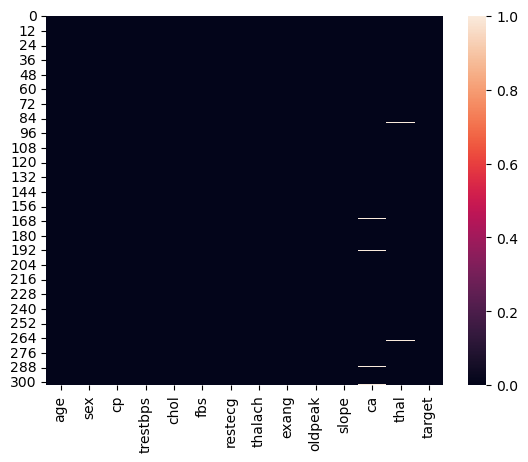

In [17]:
# visualization of nullity of the dataset
sns.heatmap(df.isnull())

## Descriptive Analysis

In [18]:
'''
Using the describe method to show basic statistical characteristics of each numerical feature (int64 and float64 types):
number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles.

'''
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.44,9.04,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.16,0.96,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.69,17.60,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.69,51.78,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.99,0.99,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.61,22.88,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


In [19]:
def check_categorical_numeric_binary_multiclass_columns(data):
    """
    In check_categorical_numeric_binary_multiclass_columns function we are doing all the things below:
    - checking the categorical features except binary multiclass label
    - checking numeric columns
    - checking binary multiclass columns that value counts exist between (2 to 10)
    """
    cat_cols_without_binary_multiclass = []
    num_cols = []
    binary_multiclass_cols = []

    for i in data.columns:
        if data[i].dtypes =='object' and (not(data[i].nunique() >=2 and data[i].nunique()<=10)):
            cat_cols_without_binary_multiclass.append(i)
        else:
            if data[i].nunique() >=2 and data[i].nunique()<=10: # if features values inside <10 then considering a binary/multi feature
                binary_multiclass_cols.append(i)
            else:
                num_cols.append(i)

    print("Length of catagorical columns: ",len(cat_cols_without_binary_multiclass))
    print(cat_cols_without_binary_multiclass)
    print(" ")
    print("Length of binary/multiclass(categorical) columns: ",len(binary_multiclass_cols))
    print(binary_multiclass_cols)
    print(" ")

    print("Length of numeric columns: ",len(num_cols))
    print(num_cols)
    print(" ")

    return cat_cols_without_binary_multiclass,binary_multiclass_cols,num_cols

Length of catagorical columns:  0
[]
 
Length of binary/multiclass(categorical) columns:  9
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
 
Length of numeric columns:  5
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
 
+-----------------------+------------------+
|                       |   DataTypesCount |
|-----------------------+------------------|
| categorical_features  |                0 |
| numerical_features    |                5 |
| binary/mutli_features |                9 |
+-----------------------+------------------+


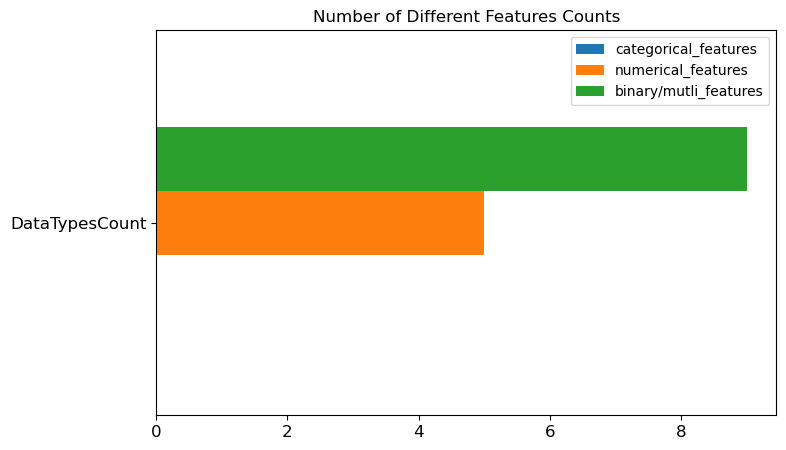

In [20]:
# lets get the categorical, binary_multiclass and numeric columns
cat_cols, binary_multiclass_cols, numeric_cols = check_categorical_numeric_binary_multiclass_columns(df)
categories_list = []
categories_list.append(len(cat_cols))
categories_list.append(len(numeric_cols))
categories_list.append(len(binary_multiclass_cols))

categories_df = pd.DataFrame(categories_list,
                             index=["categorical_features", "numerical_features", "binary/mutli_features"],
                             columns=['DataTypesCount'])
print(tabulate(categories_df, headers = 'keys', tablefmt = 'psql'))

categories_df = categories_df.transpose().plot(kind="barh", figsize=(8, 5), title="Number of Different Features Counts", fontsize=12)

### **Change Data Types of Features**
- Mostly numeric features data types is float64.
- Therefore, we will change the data types of features from float64 to float16 to reduce the memory.


In [21]:
float64_cols = df.select_dtypes(include=['float64']).columns.tolist() # check float64 features
print(float64_cols)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [22]:
df['age'].dtype # before converting the feature data types

dtype('float64')

In [23]:
for i in tqdm(float64_cols): # convert the features data types to float16
    df[i] = df[i].astype('float16')

100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 3246.56it/s]


In [24]:
df['age'].dtype # after converting the feature data types

dtype('float16')

## **Target Distribution**

In [25]:
df['target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [26]:
# lets convert into binary 0 means no heart problem and 1 means heart problem
df['target'] = df['target'].replace([1, 2, 3, 4], 1)

In [27]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    c = ['green', 'red']
    ax = df_final[col].map({0:'no heart disease', 1:'heart disease'}).value_counts().plot(kind='bar', color=c)

    plt.xlabel('Attack Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)

    plt.subplot(1, 2, 2)

    value_counts = df_final[col].value_counts()
    num_labels = len(value_counts)
    explode = [0.02] * num_labels
    colors = plt.cm.Set3(np.arange(num_labels))
    df_final[col].map({0:'no heart disease', 1:'heart disease'}).value_counts().plot.pie(explode=explode, autopct='%1.2f%%', shadow=True, colors=colors,
                                          textprops={'fontsize': 15, 'color': 'black'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend(value_counts.index)
    plt.show()


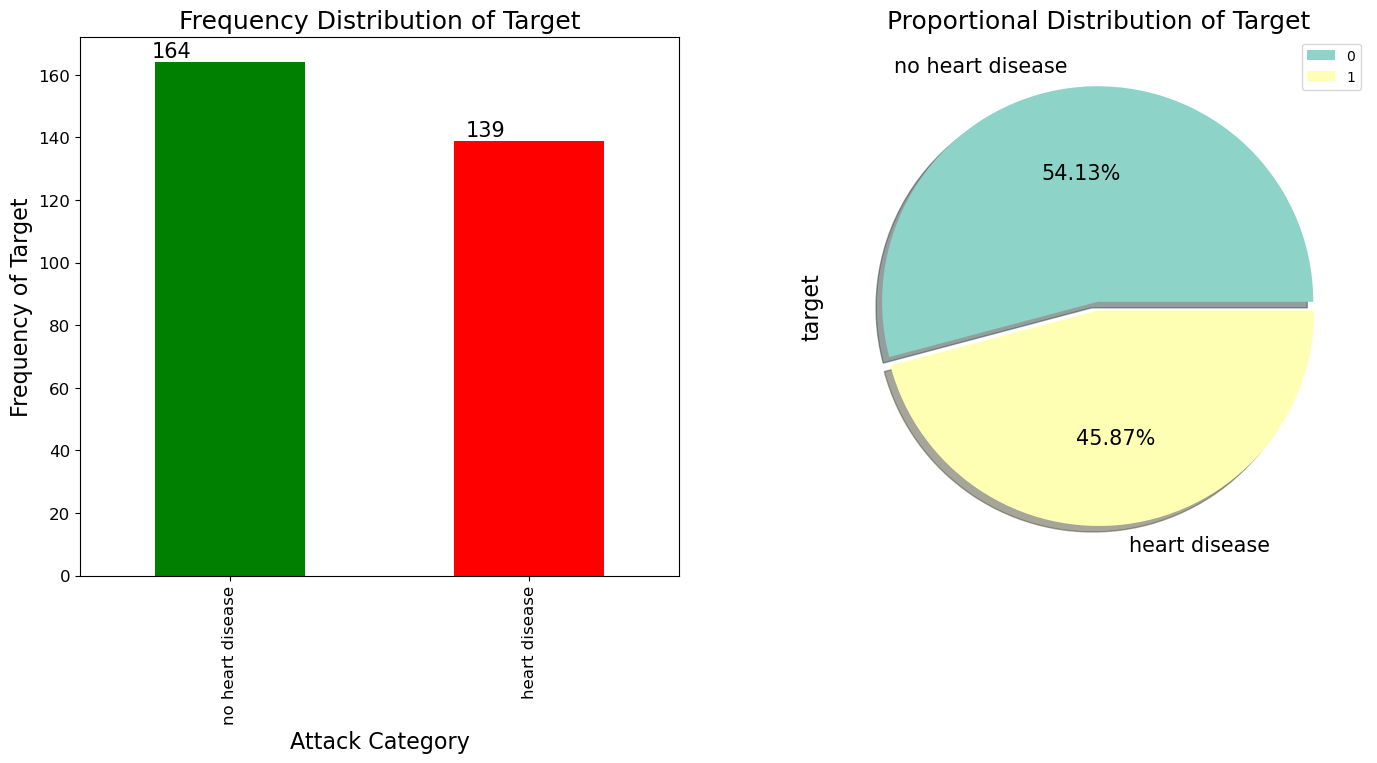

In [28]:
target_distribution(df, 'target')

- From above, we can see the distribution of results in which our target feature is in balanced form.
- 54% of one target data inside the dataset and 45% for other.
- Clearly, we can see that our dataset is balanced form. Therefore, accuracy evaluation is good when the dataset is in an imbalanced form, accuracy is biased on the majority class.
- We will check the different performance metrics Precision, Recall, F1-score, and Auc score on testing data and see how models perform according to these performance metrics.

In [29]:
df['thal'].unique()

array([ 6.,  3.,  7., nan], dtype=float16)

## **Handling Missing Values**

In [30]:
# Handle missing values in 'ca' feature
# To replace missing values with the most frequent value in the column
most_frequent_ca = df['ca'].mode()[0]
df['ca'].fillna(most_frequent_ca, inplace=True)

# Handle missing values in 'thal' feature
# To replace missing values with the median value in the column
median_thal = df['thal'].mode()[0]
df['thal'].fillna(median_thal, inplace=True)

# Verify that missing values have been handled
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [31]:
df_vis = df.copy()

In [32]:
df_vis['target'] = df_vis['target'].map({0:'no heart disease', 1:'heart disease'})

## Data Visualization

In [33]:
def plot_num_var(LC_data, colname, name):
    # Ignore warning related to font family
    warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

    # Rest of your code
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.set_facecolor("lightgrey")

    sns.boxplot(y=colname, x='target', data=LC_data, ax=ax1)
    ax1.set_ylabel(name, fontsize=14, family="sans-serif")
    ax1.set_xlabel('Count', fontsize=14, family="sans-serif")
    ax1.set_title(name + ' by target', fontweight="bold", fontsize=15, family="sans-serif")

    sns.distplot(LC_data[colname], color='y', ax=ax2)

    mean = np.mean(LC_data[colname].dropna().tolist())
    median = LC_data[colname].median()
    mode = LC_data[colname].mode()[0]

    label_mean = ("Mean: {:.2f}".format(mean))
    label_median = ("Median: {:.2f}".format(median))
    label_mode = ("Mode: {:.2f}".format(mode))

    ax2.set_title("Distribution of " + name, fontweight="bold", fontsize=15, family="sans-serif")
    ax2.set_ylabel('Density', fontsize=12, family="sans-serif")
    ax2.set_xlabel(name, fontsize=12, family="sans-serif")
    ax2.axvline(mean, color="g", label=label_mean)
    ax2.axvline(median, color="b", label=label_median)
    ax2.axvline(mode, color="r", label=label_mode)
    ax2.legend()
    plt.savefig(f"{name}.png", bbox_inches='tight')
    plt.show()

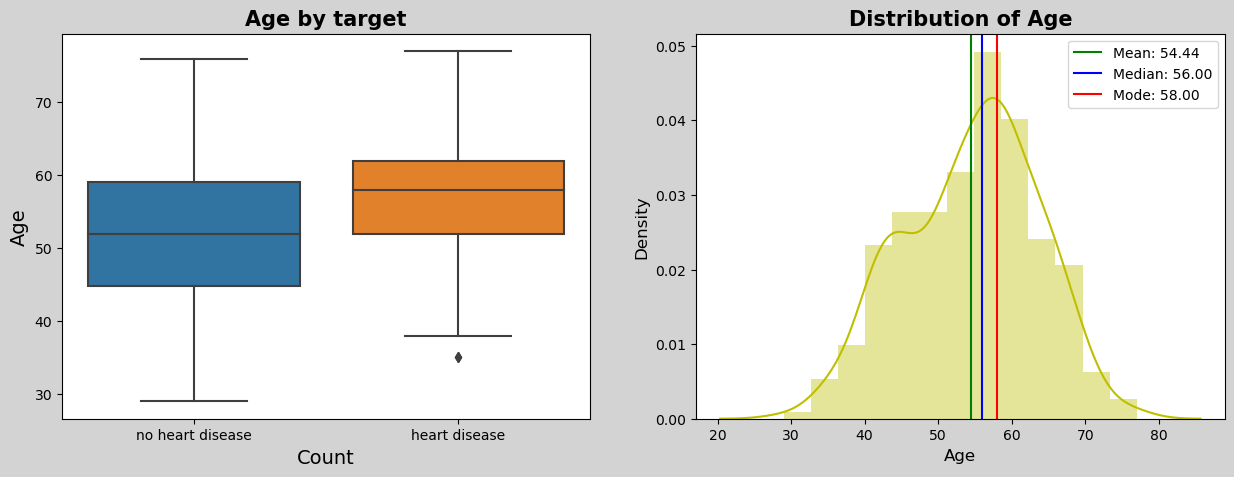

In [34]:
plot_num_var(df_vis,'age','Age')

* From the above box plot, we can see that if people age greater than average age then the high chances of heart disease.
* The most frequent aged people are 58 years.
* Average age of people 54 years.

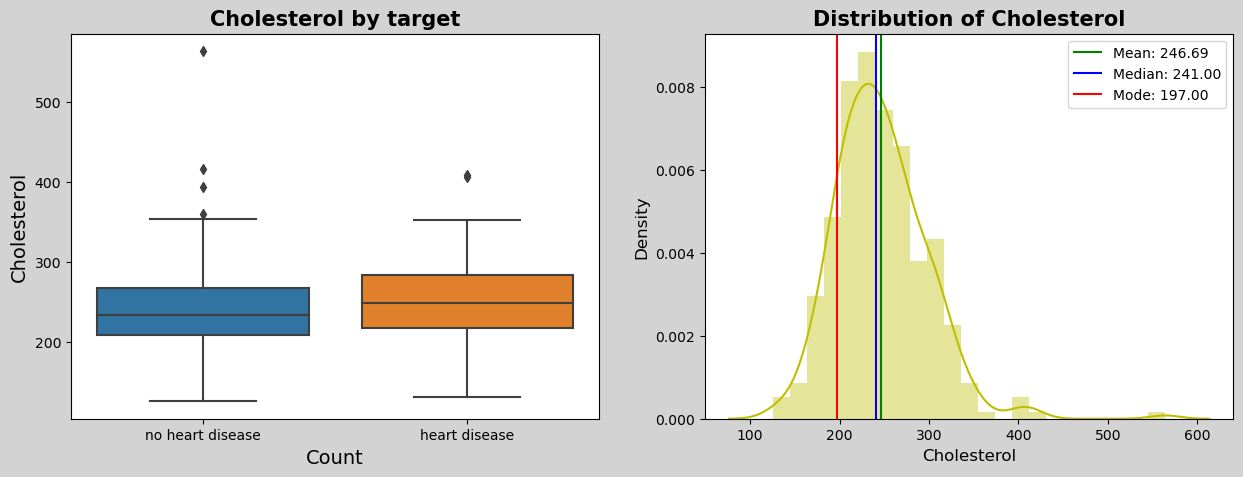

In [35]:
plot_num_var(df_vis,'chol','Cholesterol')

In [36]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, HUE=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 10, 6))
    else:
        plt.figure(figsize=(n + 10, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=HUE,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

     target  count
0  0.541254    164
1  0.458746    139


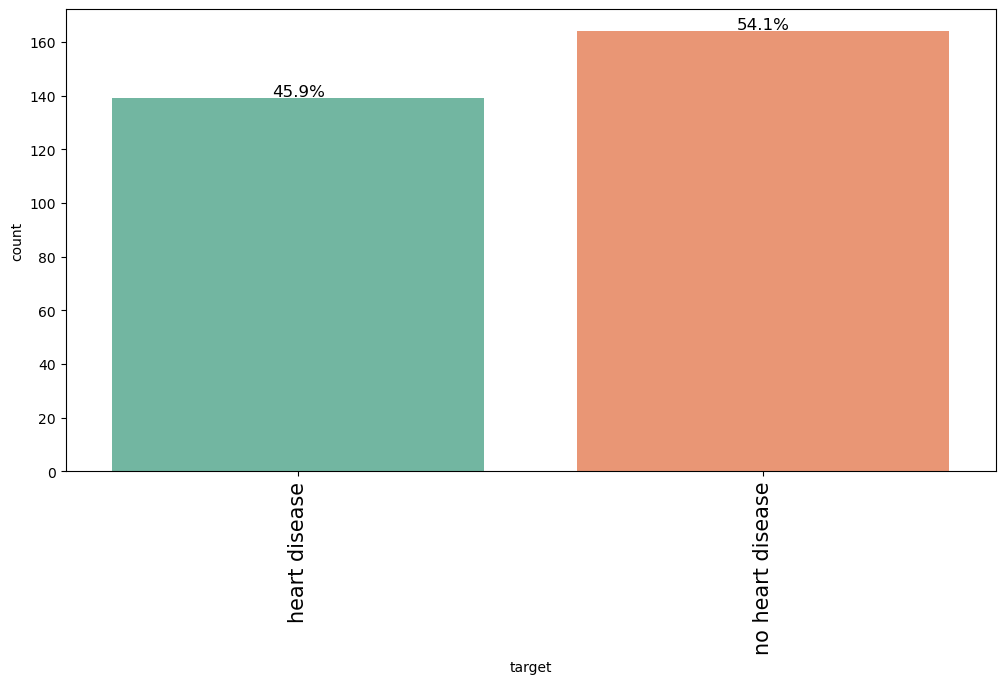

In [37]:
# lets try to check the distribution of target column popularity
target_var = pd.DataFrame(df['target'].value_counts()).reset_index()
target_var_percenatage = pd.DataFrame(df['target'].value_counts(normalize=True)).reset_index()

target_var.columns = ['target','count']
target_var_percenatage.columns = ['target','percentage']
target_var['target'] = target_var_percenatage['percentage']
print(target_var)

labeled_barplot(df_vis,'target', perc=True)

* We can see above plot our target feature is balanced. The percentage of no heart disease patient is `54.1%` and heart disease is `45.9%`

In [38]:
df_vis['sex'] = df_vis['sex'].map({0:'female', 1:'male'})

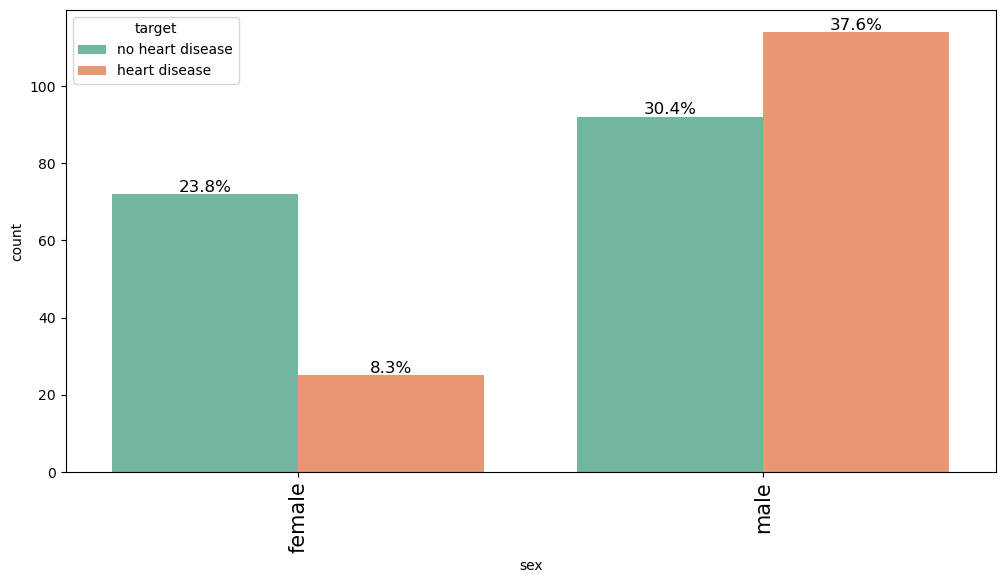

In [39]:
# lets try to check the sex against target
labeled_barplot(df_vis,'sex', perc=True, HUE='target')

* From above analysis, we can see that females (`23.8%`) are dominant for lacking heart disease as compared to males but there are also less females(`8.3%`) in this study.

In [40]:
df_vis['thal'] = df_vis['thal'].map({3:"normal", 6:"fixed defect",
                                     7:"reversible defect"})

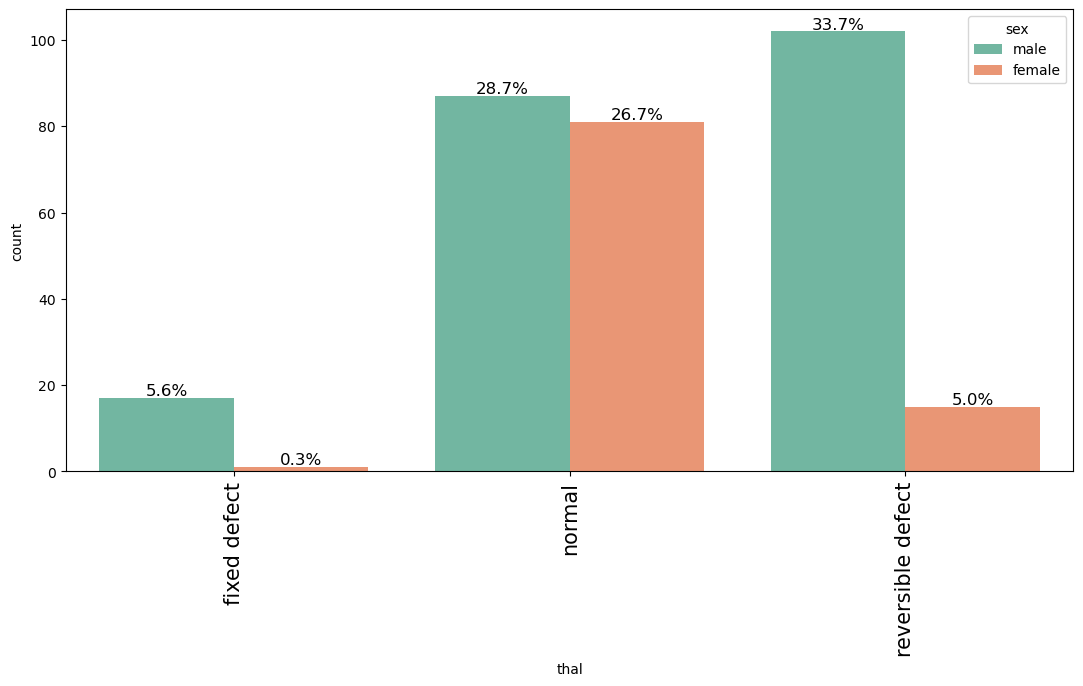

In [41]:
labeled_barplot(df_vis,'thal', perc=True, HUE='sex')

* From above analysis, males are dominant to females. However normal ratio approx. is the same

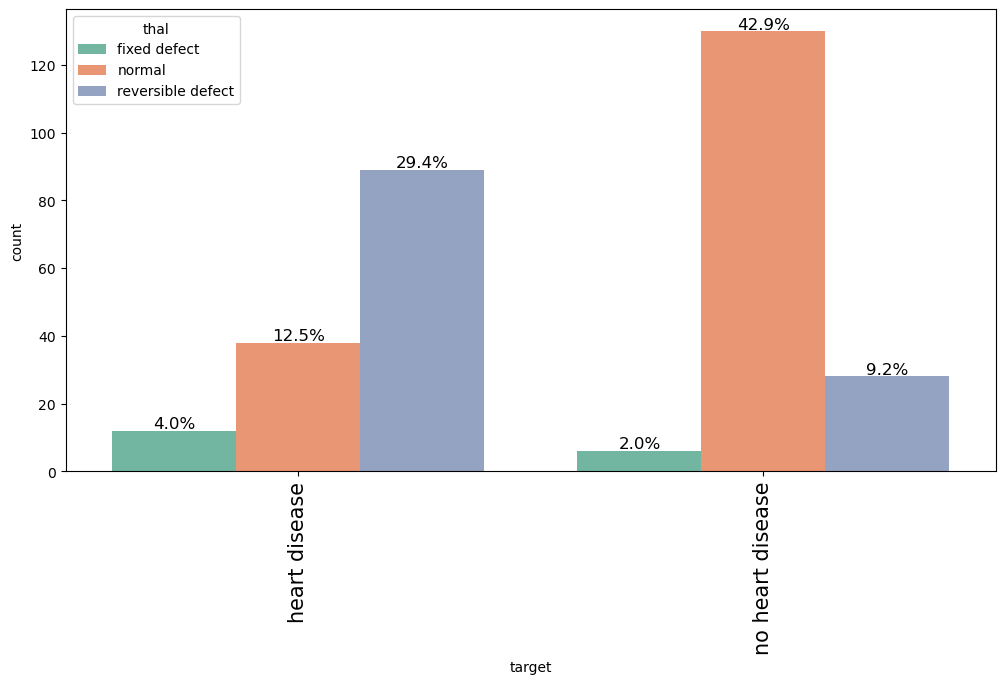

In [42]:
labeled_barplot(df_vis,'target', perc=True, HUE='thal')

* From above anaylsis, we can see most heart disease is caused by reversible defects (29.4%).

In [43]:
df_vis['cp'] = df_vis['cp'].map({0:"typical angina", 1:"atypical angina",
                                     2:"non-anginal pain",
                                     3:"asymptomatic"})

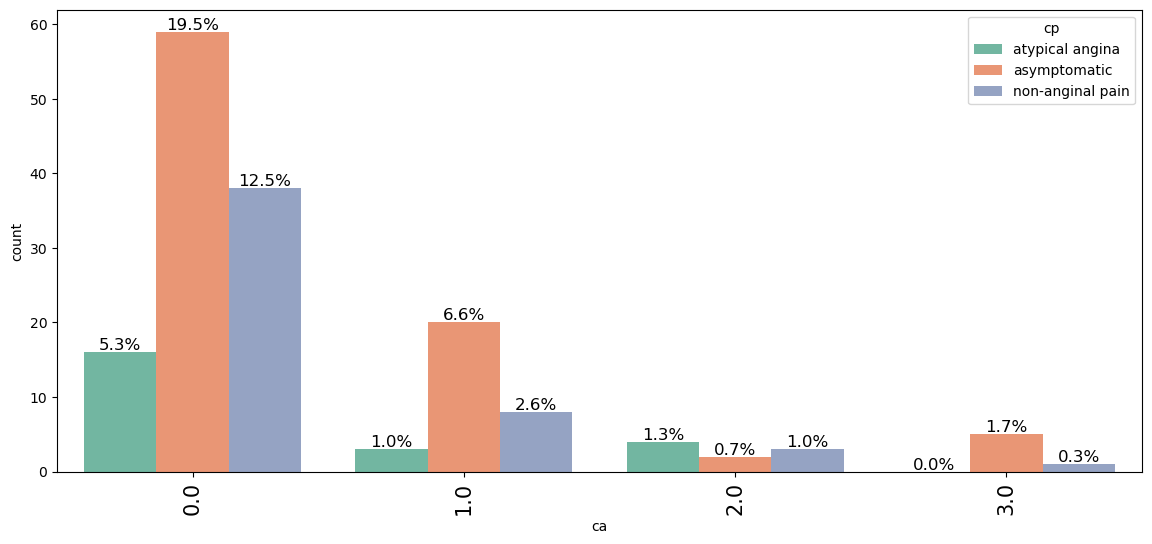

In [44]:
labeled_barplot(df_vis,'ca', perc=True, HUE='cp')

* From above anaylsis between ca and cp, most cp are `asymptomatic` on 0 blood vessels (0 means 1 blood vessel).

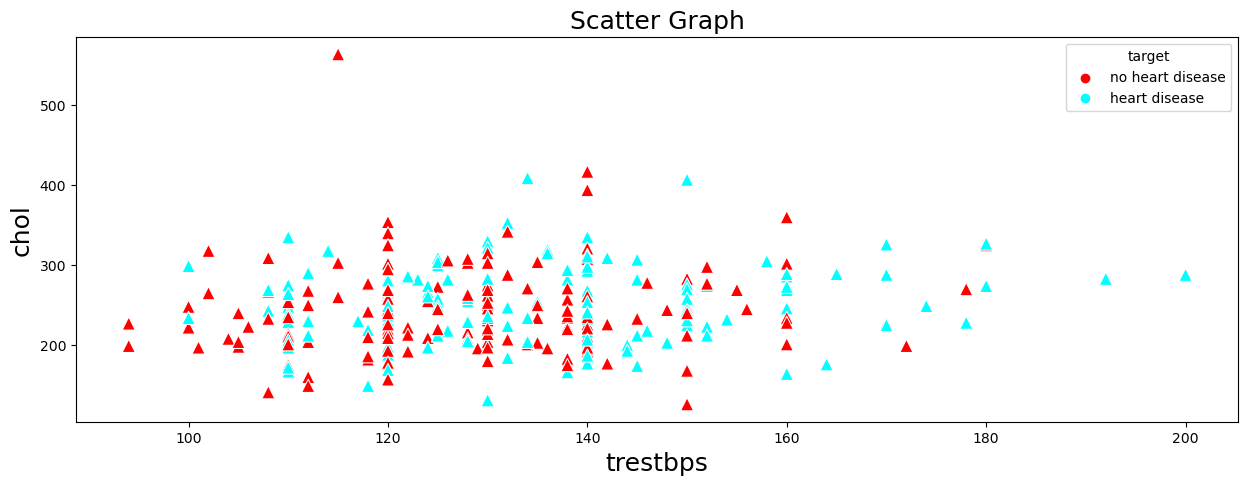

In [45]:
# lets try to check the distrbution between radius_mean and area_mean against diagnosis
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='trestbps', y='chol', data=df_vis, hue="target", palette=['red','cyan'], s=90, marker="^")

plt.title("Scatter Graph",fontsize=18)
plt.xlabel("trestbps",fontsize=18)
plt.ylabel('chol', fontsize=18)
plt.show()

* The above relationship between trestbps and chol , we can see that most are heart disease patients.

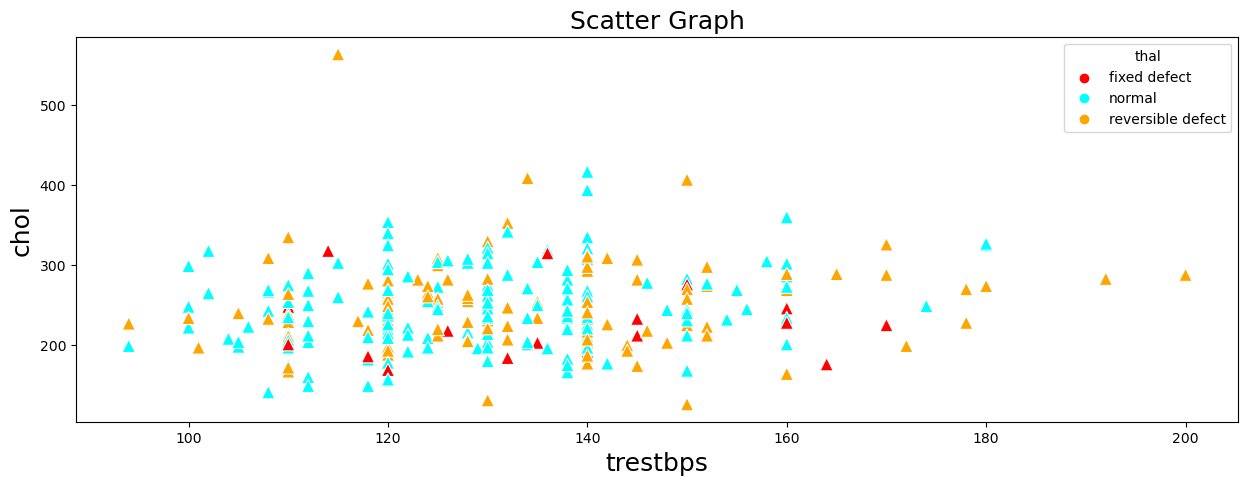

In [46]:
# lets try to check the distrbution between radius_mean and area_mean against diagnosis
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='trestbps', y='chol', data=df_vis, hue="thal", palette=['red','cyan','orange','green'], s=90, marker="^")


plt.title("Scatter Graph",fontsize=18)
plt.xlabel("trestbps",fontsize=18)
plt.ylabel('chol', fontsize=18)
plt.show()

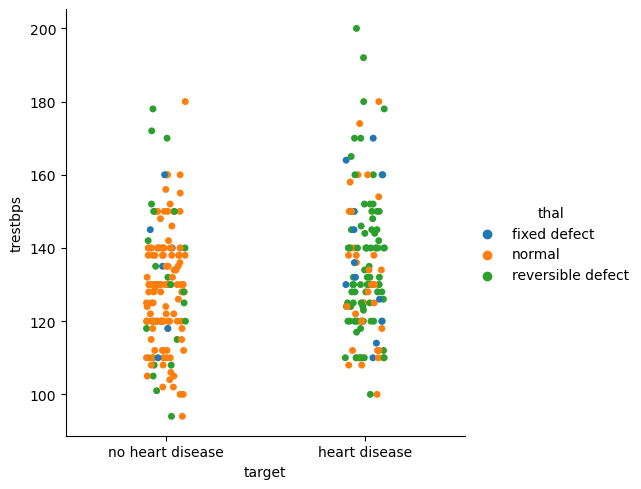

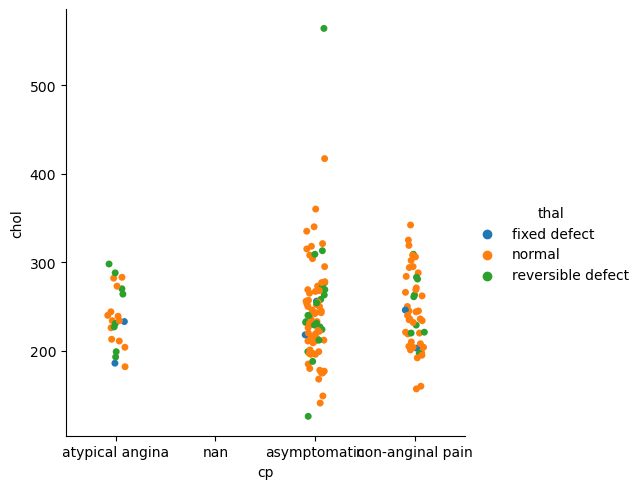

In [47]:
# checking the distribution through cat plot between target and trestbps Values against thal
sns.catplot(x='target', y='trestbps',hue='thal', data=df_vis)
sns.catplot(x='cp', y='chol',hue='thal', data=df_vis)
plt.show()

## Distribution of numerical variables

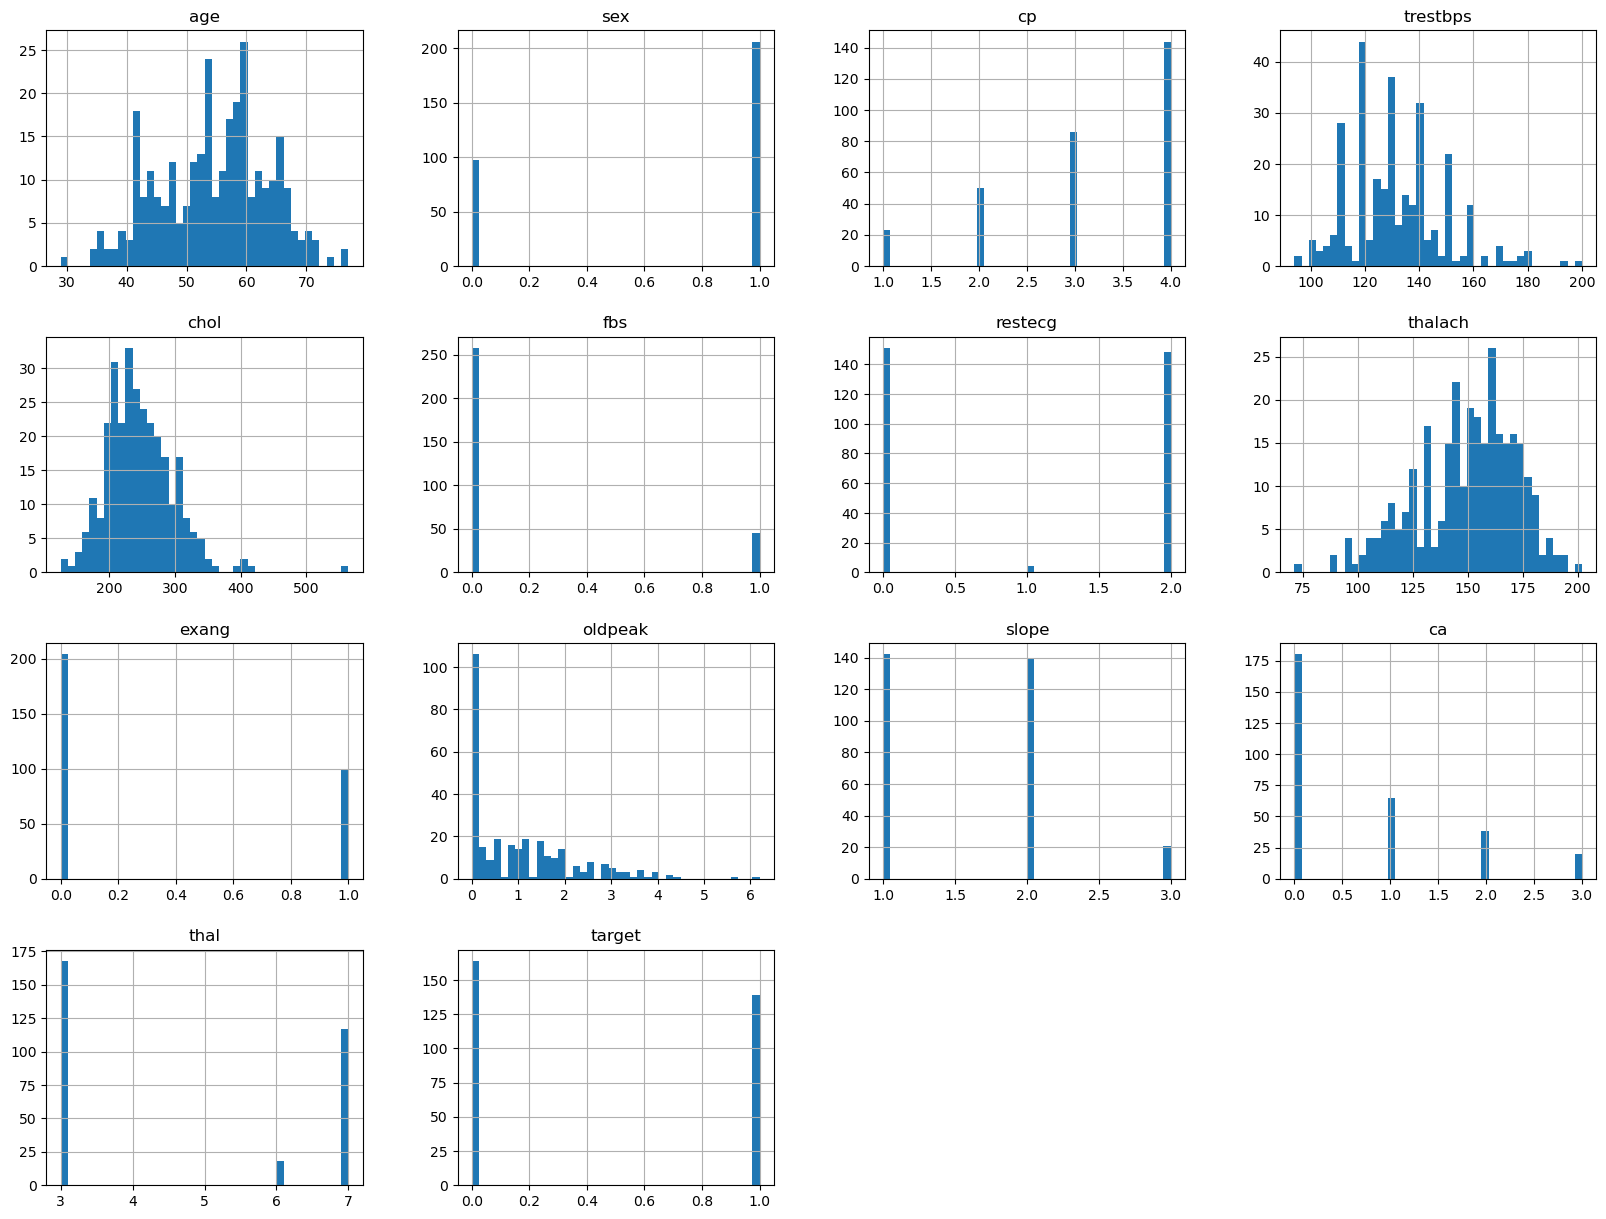

In [48]:
# Overall idea about distribution of data histogram numeric columns## Distribution of categorical variables
df.hist(bins=40, figsize=(20,15))
plt.show()

## Feature Engineering,Data Preprocessing

In [49]:
'''
lets try to check the percentage of missing values,unique values,percentage of one catagory values
and type against each column.

'''
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
df_ = stats_df.sort_values('% MissingValues', ascending=False)
print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

+----+-----------+-----------------+-------------------+------------------------------+---------+
|    | Feature   |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+-----------+-----------------+-------------------+------------------------------+---------|
|  0 | age       |              41 |                 0 |                      6.27063 | float16 |
|  1 | sex       |               2 |                 0 |                     67.9868  | float16 |
|  2 | cp        |               4 |                 0 |                     47.5248  | float16 |
|  3 | trestbps  |              50 |                 0 |                     12.2112  | float16 |
|  4 | chol      |             152 |                 0 |                      1.9802  | float16 |
|  5 | fbs       |               2 |                 0 |                     85.1485  | float16 |
|  6 | restecg   |               3 |                 0 |                     49.835   | float16 |
|  7 | thalach   |  

* We can see above in table , the unique values, percentage of missing and high one category values.

#  **Biostatistics Tests**

###  Pearson correlation coefficients (PCC)

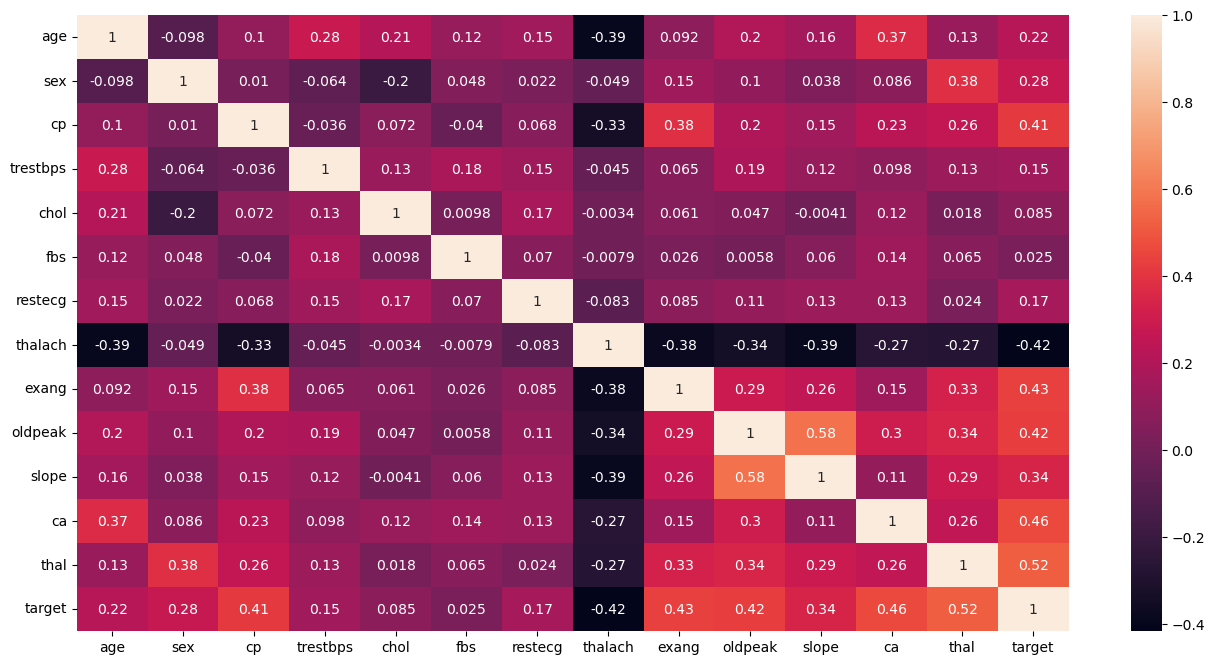

In [50]:
'''
High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature.<br><br>
    As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.<br><br>
    Let’s perform the correlation calculation.
    '''
#check the Correlation heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr,annot=True)
plt.savefig("correlation.jpg")
plt.show()

In [51]:
# lets try to check the correlation of each variable with target variable Vehicle Class
df_cor = pd.DataFrame(abs(df.corr()["target"]).sort_values(ascending=False))
# df_cor = pd.DataFrame(df.corr()["target"].sort_values(ascending=False))

df_cor.rename(columns={'target':'(abs) Correlation With target'}, inplace=True)
# displaying the DataFrame
print(tabulate(df_cor, headers = 'keys', tablefmt = 'psql'))

+----------+---------------------------------+
|          |   (abs) Correlation With target |
|----------+---------------------------------|
| target   |                       1         |
| thal     |                       0.522057  |
| ca       |                       0.460033  |
| exang    |                       0.431894  |
| oldpeak  |                       0.424513  |
| thalach  |                       0.417167  |
| cp       |                       0.414446  |
| slope    |                       0.339213  |
| sex      |                       0.276816  |
| age      |                       0.22312   |
| restecg  |                       0.169202  |
| trestbps |                       0.150825  |
| chol     |                       0.0851636 |
| fbs      |                       0.0252637 |
+----------+---------------------------------+


* We check the correlation of all features with target features, fbs and chol features are too low correlated with target. so we will remove the feature.

## **Feature Selection**
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.300781,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.500000,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.599609,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.500000,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.400391,1.0,0.0,3.0,0


In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.drop('target', axis = 1)  #independent columns
y = data['target']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs       Score
7    thalach  183.821471
11        ca   84.115181
9    oldpeak   70.572294
12      thal   65.482313
8      exang   38.052613
4       chol   23.802935
0        age   22.562319
3   trestbps   16.159096
2         cp   15.140160
6    restecg    8.644897


In [54]:
top_10_best_features = featureScores.nlargest(10,'Score')['Specs'].values
top_10_best_features

array(['thalach', 'ca', 'oldpeak', 'thal', 'exang', 'chol', 'age',
       'trestbps', 'cp', 'restecg'], dtype=object)

## Importing Libraries

In [55]:
import time

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#import for preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder

# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import roc_curve, auc, roc_auc_score
import random
import pickle

## Extract Dependent and Independent Variables

In [56]:
X = df[top_10_best_features]
y = df['target']

In [57]:
'''
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range.
In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

'''
# standardization our data that better for in model prediction because values lies in a specific range (0,1)
st_x= StandardScaler()
X_std= st_x.fit_transform(X)
# X_test= st_x.transform(X_test)

# Save the scaler as a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(st_x, file)

## Split Train Test

In [58]:
random.seed(42)

In [59]:
'''
Every dataset for Machine Learning model must be split into two separate sets – training set and test set.
Usually, the dataset is split into 70:30 ratio or 80:20 ratio. This means that you either take 70% or 80% of the data for training the model
while leaving out the rest 30% or 20%. The splitting process varies according to the shape and size of the dataset in question.

'''
# splitting the dataset 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.25, random_state = 0)

In [60]:
# lets try to check the shape of training and testing
print("training shape: ",X_train.shape)
print("testing shape: ", X_test.shape)

training shape:  (227, 10)
testing shape:  (76, 10)


In [61]:
X_train_org = X_train.copy()

In [62]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(model,predictions, y_test_set, model_name):
    #kfold cross validation
    kfold = KFold(n_splits=10)

    # Print model evaluation to predicted result
    start_time = time.time()
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions, average='macro')))
    print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions, average='macro')))
    print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions, average='macro')))

    y_score = model.predict_proba(X_test)
    fpr, tpr, th = roc_curve(y_test_set, y_score[:,1])

    roc_auc = auc(fpr, tpr)
    print ("ROC_AUC on validation set: {:.4f}".format(roc_auc))
    scores = cross_validate(model, X, y, cv=kfold, scoring='accuracy')

    print ("KFold Cross Validation on validation set: {:.4f}".format(scores['test_score'].mean()))


    print ("\nClassification report : \n", classification_report(y_test_set, predictions, target_names=['no heart disease', 'heart disease']))

    print("="*30)
    print ("\tConfusion Matrix",)
    print("="*30)


    cm = confusion_matrix(y_test_set, predictions)

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum()) for item in cm.flatten()]

        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))

    sns.heatmap(cm, annot=labels, fmt="",yticklabels=['no heart disease', 'heart disease'],xticklabels=['no heart disease', 'heart disease'])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    end = round(time.time()-start_time,3)
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro'),roc_auc,scores['test_score'].mean(),end]
    return results

# Model building - Logistic Regression

========== logistic Regression ==========

Accuracy on validation set: 0.8158
Precision on validation set: 0.8246
Recall on validation set: 0.8111
F1_Score on validation set: 0.8125
ROC_AUC on validation set: 0.8549
KFold Cross Validation on validation set: 0.8348

Classification report : 
                   precision    recall  f1-score   support

no heart disease       0.78      0.90      0.84        40
   heart disease       0.87      0.72      0.79        36

        accuracy                           0.82        76
       macro avg       0.82      0.81      0.81        76
    weighted avg       0.82      0.82      0.81        76

	Confusion Matrix


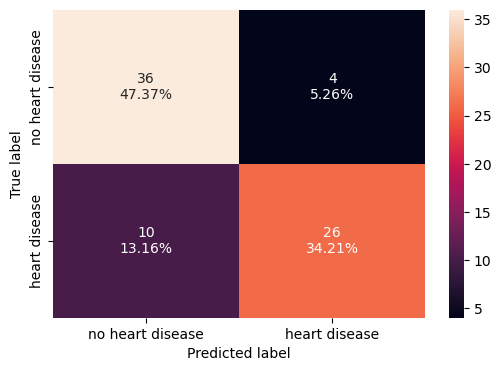

In [63]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
results_lr = modelEvaluation(lr,predictions, y_test, "logistic Regression")

In [64]:
imp_dict = {attr: lr.coef_[0][i] for i, attr in enumerate(X.columns.tolist())}
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'thal': 0.9424918479382454,
 'ca': 0.9040780614972475,
 'exang': 0.6530208914530707,
 'oldpeak': 0.5056845221647822,
 'cp': 0.4730975283531939,
 'trestbps': 0.4730848196864027,
 'chol': 0.3509538439743981,
 'restecg': 0.13492102343194237,
 'age': -0.16493303573138368,
 'thalach': -0.4773370162508853}

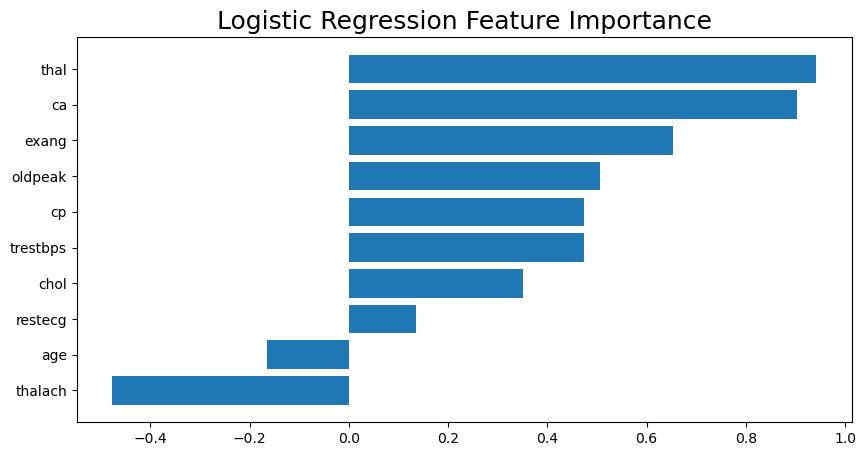

In [65]:
# let’s sort the features, and plot graph
plt.figure(figsize=(10,5))
sorted_idx = lr.coef_[0].argsort()
plt.barh(X.columns[sorted_idx], lr.coef_[0][sorted_idx])
plt.title("Logistic Regression Feature Importance", fontsize=18)
plt.show()

ROC_AUC score : 0.8548611111111111


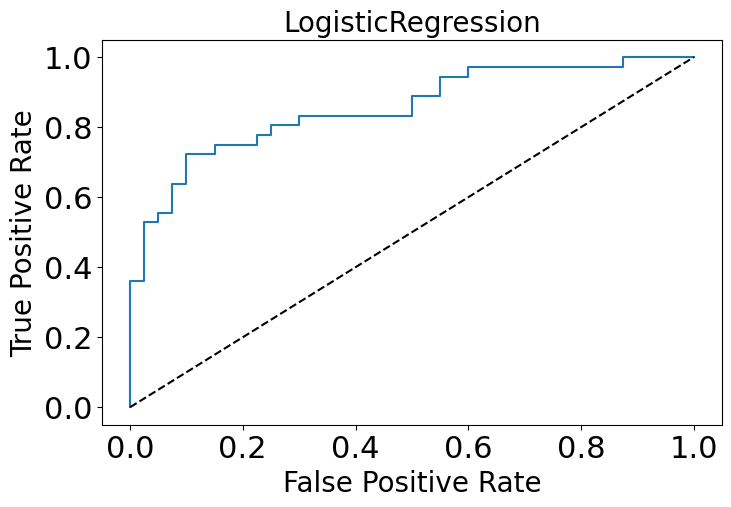

In [66]:
y_score = lr.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print("ROC_AUC score :",roc_auc)
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)
plt.title("LogisticRegression", fontsize=20)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Average Testing Accuracy : 0.8348387096774192


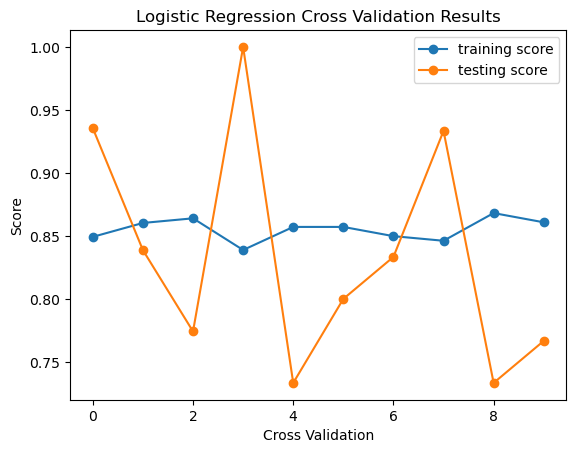

In [67]:
# cross-validation
kfold = KFold(n_splits=10)

scores = cross_validate(lr, X, y, cv=kfold, scoring='accuracy',return_train_score=True)
print(f"Average Testing Accuracy : {scores['test_score'].mean()}")

plt.plot(scores['train_score'] ,label ='training score', marker='o')
plt.plot(scores['test_score'] ,label ='testing score',marker='o')
plt.title("Logistic Regression Cross Validation Results")
plt.xlabel("Cross Validation")
plt.ylabel("Score")
plt.legend()
plt.show()

# Model building - Decision Tree

========== DecisionTreeClassifier ==========

Accuracy on validation set: 0.7237
Precision on validation set: 0.7649
Recall on validation set: 0.7125
F1_Score on validation set: 0.7053
ROC_AUC on validation set: 0.8257
KFold Cross Validation on validation set: 0.7719

Classification report : 
                   precision    recall  f1-score   support

no heart disease       0.67      0.93      0.78        40
   heart disease       0.86      0.50      0.63        36

        accuracy                           0.72        76
       macro avg       0.76      0.71      0.71        76
    weighted avg       0.76      0.72      0.71        76

	Confusion Matrix


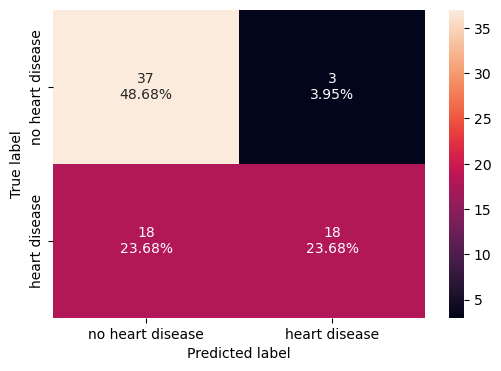

In [68]:
# evaluating the model
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=5 ,
                             min_samples_split=10,
                             min_samples_leaf=22,
                             )

dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
results_mp = modelEvaluation(dt,prediction, y_test,"DecisionTreeClassifier")

In [69]:
imp_dict = {attr: dt.feature_importances_[i] for i, attr in enumerate(X.columns.tolist())}
features_dic = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}
features_dic

{'thal': 0.6109883466664013,
 'cp': 0.21351039033561897,
 'oldpeak': 0.14110442706075219,
 'age': 0.03094646116233314,
 'chol': 0.0034503747748943817,
 'thalach': 0.0,
 'ca': 0.0,
 'exang': 0.0,
 'trestbps': 0.0,
 'restecg': 0.0}

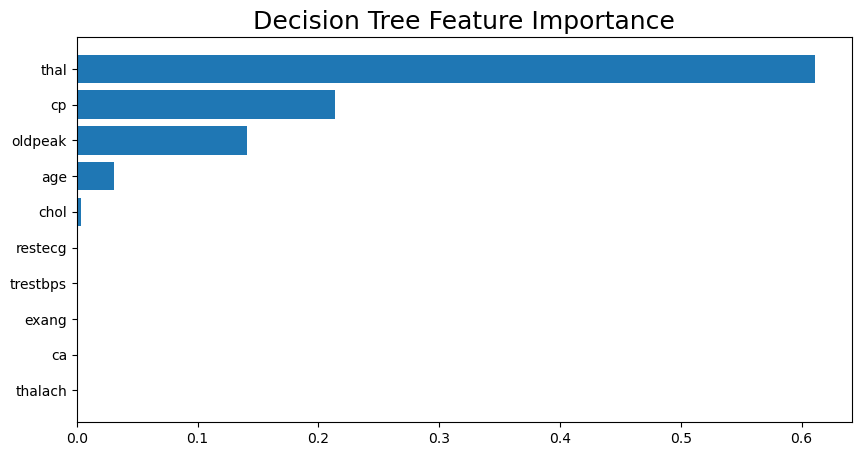

In [70]:
# let’s sort the features, and plot graph
plt.figure(figsize=(10,5))
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], dt.feature_importances_[sorted_idx])
plt.title("Decision Tree Feature Importance", fontsize=18)
plt.show()

ROC_AUC score : 0.8256944444444445


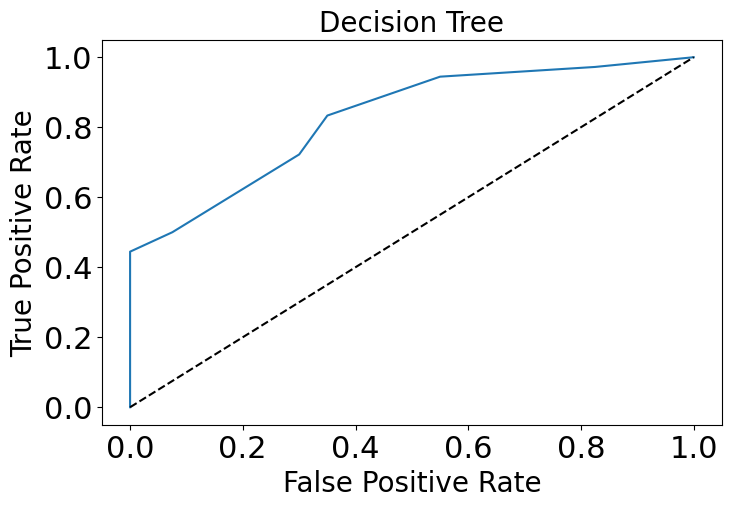

In [71]:
y_score = dt.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print("ROC_AUC score :",roc_auc)
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)
plt.title("Decision Tree", fontsize=20)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Average Testing Accuracy : 0.7719354838709678


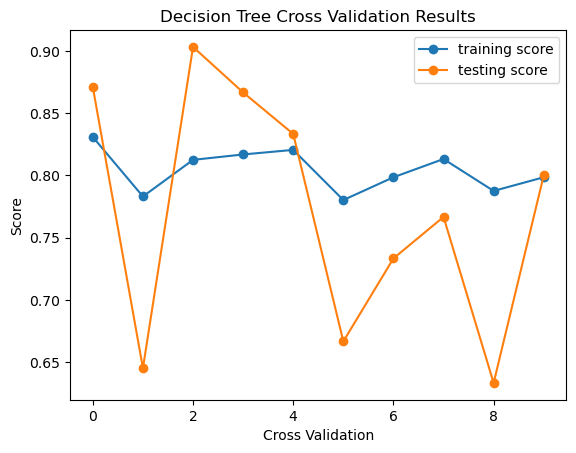

In [72]:
# cross-validation
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X, y, cv=kfold, scoring='accuracy',return_train_score=True)
print(f"Average Testing Accuracy : {scores['test_score'].mean()}")

plt.plot(scores['train_score'] ,label ='training score', marker='o')
plt.plot(scores['test_score'] ,label ='testing score',marker='o')
plt.title("Decision Tree Cross Validation Results")
plt.xlabel("Cross Validation")
plt.ylabel("Score")
plt.legend()
plt.show()

# Model building - Random Forest

========== RandomForestClassifier ==========

Accuracy on validation set: 0.7763
Precision on validation set: 0.7861
Recall on validation set: 0.7708
F1_Score on validation set: 0.7715
ROC_AUC on validation set: 0.8472
KFold Cross Validation on validation set: 0.7984

Classification report : 
                   precision    recall  f1-score   support

no heart disease       0.74      0.88      0.80        40
   heart disease       0.83      0.67      0.74        36

        accuracy                           0.78        76
       macro avg       0.79      0.77      0.77        76
    weighted avg       0.78      0.78      0.77        76

	Confusion Matrix


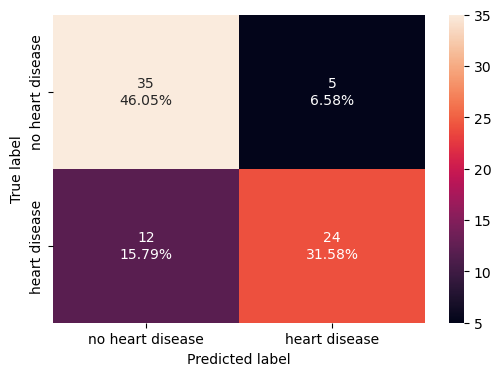

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
results_rf = modelEvaluation(rf,predictions, y_test, "RandomForestClassifier")

In [74]:
imp_dict = {attr: rf.feature_importances_[i] for i, attr in enumerate(X.columns.tolist())}
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'oldpeak': 0.15135294193878698,
 'cp': 0.1293591838159428,
 'thal': 0.1272812880111323,
 'thalach': 0.11648137484144737,
 'exang': 0.0997614719518038,
 'age': 0.09859357827019022,
 'trestbps': 0.08753852328057517,
 'ca': 0.08643297744676853,
 'chol': 0.08624159949722598,
 'restecg': 0.016957060946126905}

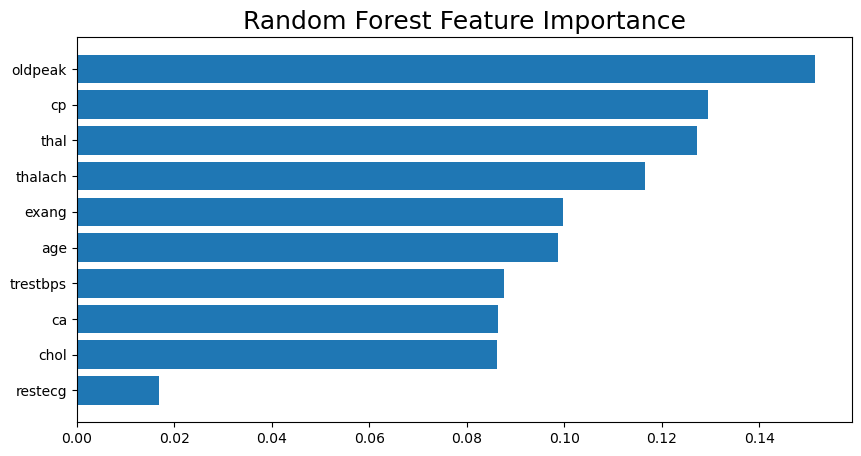

In [75]:
# let’s sort the features, and plot graph
plt.figure(figsize=(10,5))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance", fontsize=18)
plt.show()

ROC_AUC score : 0.8472222222222222


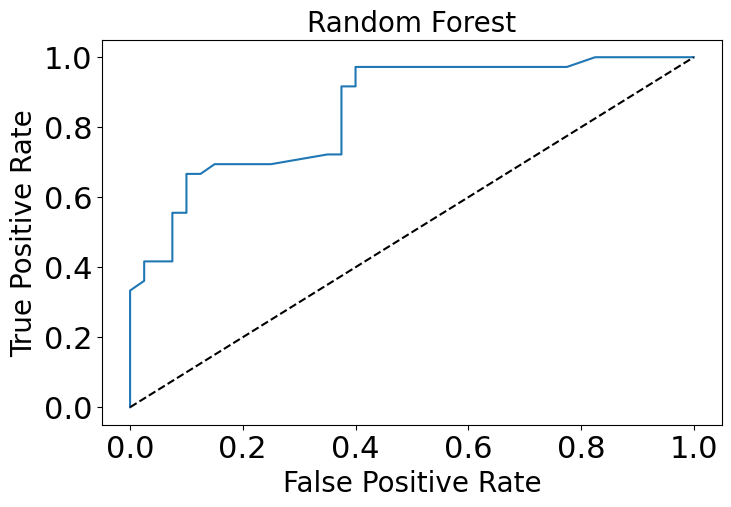

In [76]:
y_score = rf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print("ROC_AUC score :",roc_auc)
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.title("Random Forest", fontsize=20)

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Average Testing Accuracy : 0.8117204301075269


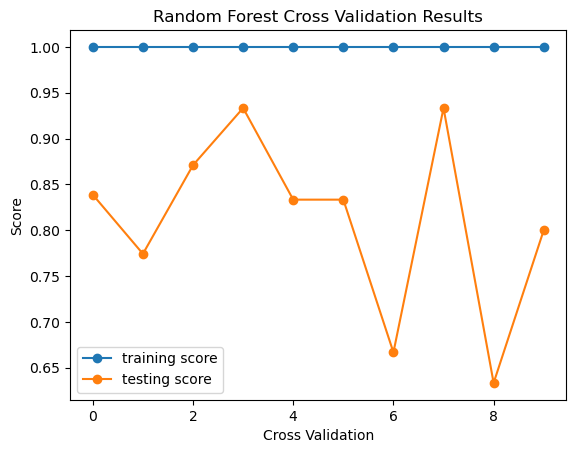

In [77]:
# cross-validation
from sklearn.model_selection import cross_validate

scores = cross_validate(rf, X, y, cv=kfold, scoring='accuracy',return_train_score=True)
print(f"Average Testing Accuracy : {scores['test_score'].mean()}")

plt.plot(scores['train_score'] ,label ='training score', marker='o')
plt.plot(scores['test_score'] ,label ='testing score',marker='o')
plt.title("Random Forest Cross Validation Results")
plt.xlabel("Cross Validation")
plt.ylabel("Score")
plt.legend()
plt.show()

# Model building - BaggingClassifier

========== BaggingClassifier ==========

Accuracy on validation set: 0.7368
Precision on validation set: 0.7538
Recall on validation set: 0.7292
F1_Score on validation set: 0.7276
ROC_AUC on validation set: 0.8073
KFold Cross Validation on validation set: 0.7685

Classification report : 
                   precision    recall  f1-score   support

no heart disease       0.70      0.88      0.78        40
   heart disease       0.81      0.58      0.68        36

        accuracy                           0.74        76
       macro avg       0.75      0.73      0.73        76
    weighted avg       0.75      0.74      0.73        76

	Confusion Matrix


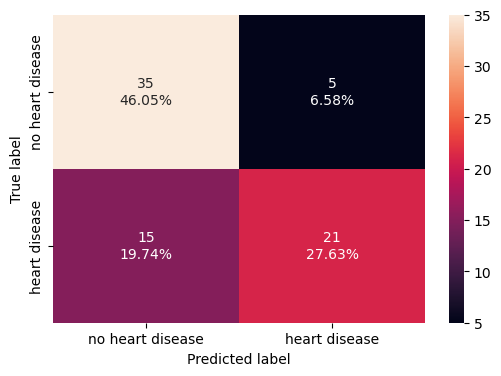

In [78]:
from sklearn.ensemble import BaggingClassifier
# svc = SVC(probability=True)
bg = BaggingClassifier()

bg.fit(X_train, y_train)
predictions = bg.predict(X_test)
results_bg = modelEvaluation(bg,predictions, y_test, "BaggingClassifier")

ROC_AUC score : 0.8072916666666666


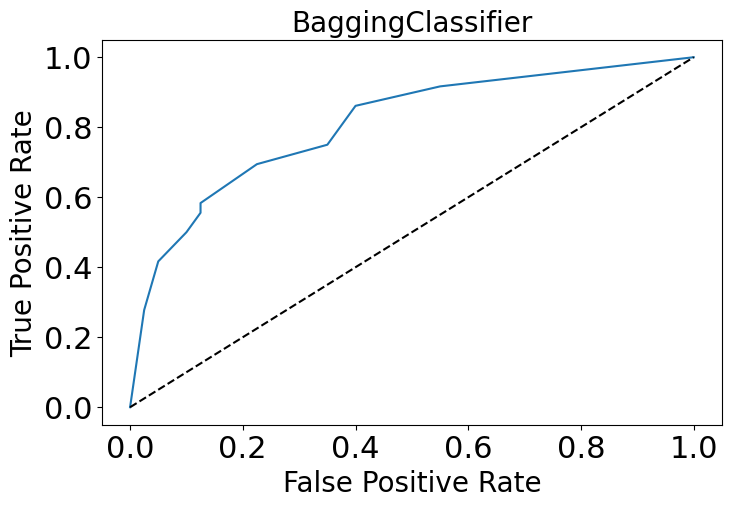

In [79]:
y_score = bg.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print("ROC_AUC score :",roc_auc)
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.title("BaggingClassifier", fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Average Testing Accuracy : 0.7851612903225805


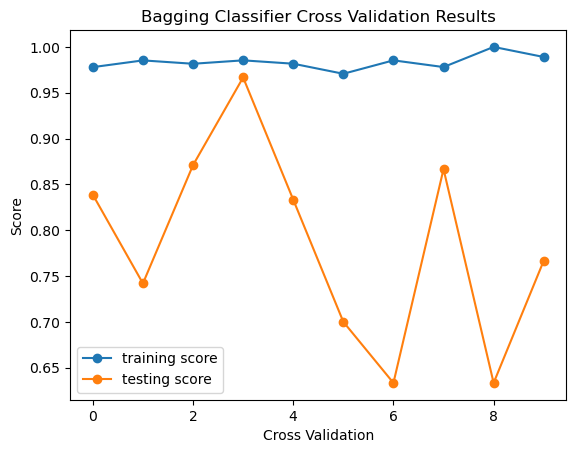

In [80]:
# cross-validation
from sklearn.model_selection import cross_validate

scores = cross_validate(bg, X, y, cv=kfold, scoring='accuracy',return_train_score=True)
print(f"Average Testing Accuracy : {scores['test_score'].mean()}")

plt.plot(scores['train_score'] ,label ='training score', marker='o')
plt.plot(scores['test_score'] ,label ='testing score',marker='o')
plt.title("Bagging Classifier Cross Validation Results")
plt.xlabel("Cross Validation")
plt.ylabel("Score")
plt.legend()
plt.show()

## **Model Performance Evaluation**

In [81]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score','AUC_ROC','KFoldCrossVal','time detection'],
    'DTree' : results_mp,
    'RandomForest' : results_rf,
    'LogisticRegression' : results_lr,
    'BaggingClassifier' : results_bg,

}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+--------------------+------------+-------------+----------+------------+-----------+-----------------+------------------+
|                    |   accuracy |   precision |   recall |   f1-score |   AUC_ROC |   KFoldCrossVal |   time detection |
|--------------------+------------+-------------+----------+------------+-----------+-----------------+------------------|
| DTree              |   0.723684 |    0.764935 | 0.7125   |   0.705263 |  0.825694 |        0.771935 |            0.142 |
| RandomForest       |   0.776316 |    0.786134 | 0.770833 |   0.77153  |  0.847222 |        0.798387 |            1.258 |
| LogisticRegression |   0.815789 |    0.824638 | 0.811111 |   0.812544 |  0.854861 |        0.834839 |            0.231 |
| BaggingClassifier  |   0.736842 |    0.753846 | 0.729167 |   0.727599 |  0.807292 |        0.768495 |            0.292 |
+--------------------+------------+-------------+----------+------------+-----------+-----------------+------------------+


* Logistic Regression giving better score, lets tune the logistic regression next.

## **Hyperparameter Tuning**

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_list = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1.0, 1.5],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

lr_ = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lr_, param_grid=param_list, n_jobs=-1, verbose=2)


In [83]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0, 1.5], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [84]:
res = grid_search.cv_results_

In [85]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [86]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.851 (std: 0.036)
Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

Model with rank: 1
Mean validation score: 0.851 (std: 0.036)
Parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

Model with rank: 1
Mean validation score: 0.851 (std: 0.036)
Parameters: {'C': 0.1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}



========== Tune Logistic Regression ==========

Accuracy on validation set: 0.8421
Precision on validation set: 0.8601
Recall on validation set: 0.8361
F1_Score on validation set: 0.8381
ROC_AUC on validation set: 0.8667
KFold Cross Validation on validation set: 0.6934

Classification report : 
                   precision    recall  f1-score   support

no heart disease       0.79      0.95      0.86        40
   heart disease       0.93      0.72      0.81        36

        accuracy                           0.84        76
       macro avg       0.86      0.84      0.84        76
    weighted avg       0.86      0.84      0.84        76

	Confusion Matrix


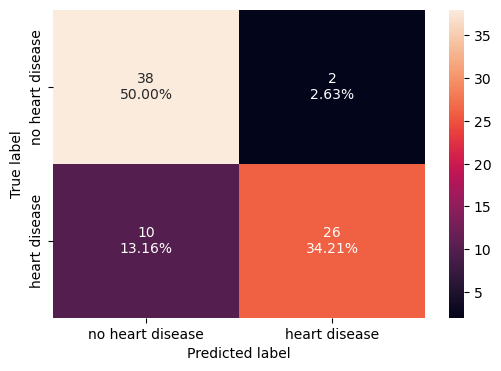

In [88]:
# evaluating the model on best parameters that we get from grid search
m = grid_search.best_estimator_
prediction = m.predict(X_test)
grid_accuracy_rf_ = modelEvaluation(m,prediction, y_test,"Tune Logistic Regression")

## **Models Evaluation**

In [89]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score','AUC_ROC','KFoldCrossVal','time detection'],
    'Decesion-Tree' : results_mp,
    'Random-Forest' : results_rf,
    'Logistic-Regression' : results_lr,
    'Bagging-Classifier' : results_bg,
    'Tune-Logistic-Regression':grid_accuracy_rf_

}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+--------------------------+------------+-------------+----------+------------+-----------+-----------------+------------------+
|                          |   accuracy |   precision |   recall |   f1-score |   AUC_ROC |   KFoldCrossVal |   time detection |
|--------------------------+------------+-------------+----------+------------+-----------+-----------------+------------------|
| Decesion-Tree            |   0.723684 |    0.764935 | 0.7125   |   0.705263 |  0.825694 |        0.771935 |            0.142 |
| Random-Forest            |   0.776316 |    0.786134 | 0.770833 |   0.77153  |  0.847222 |        0.798387 |            1.258 |
| Logistic-Regression      |   0.815789 |    0.824638 | 0.811111 |   0.812544 |  0.854861 |        0.834839 |            0.231 |
| Bagging-Classifier       |   0.736842 |    0.753846 | 0.729167 |   0.727599 |  0.807292 |        0.768495 |            0.292 |
| Tune-Logistic-Regression |   0.842105 |    0.860119 | 0.836111 |   0.838068 |  0.866667 |      

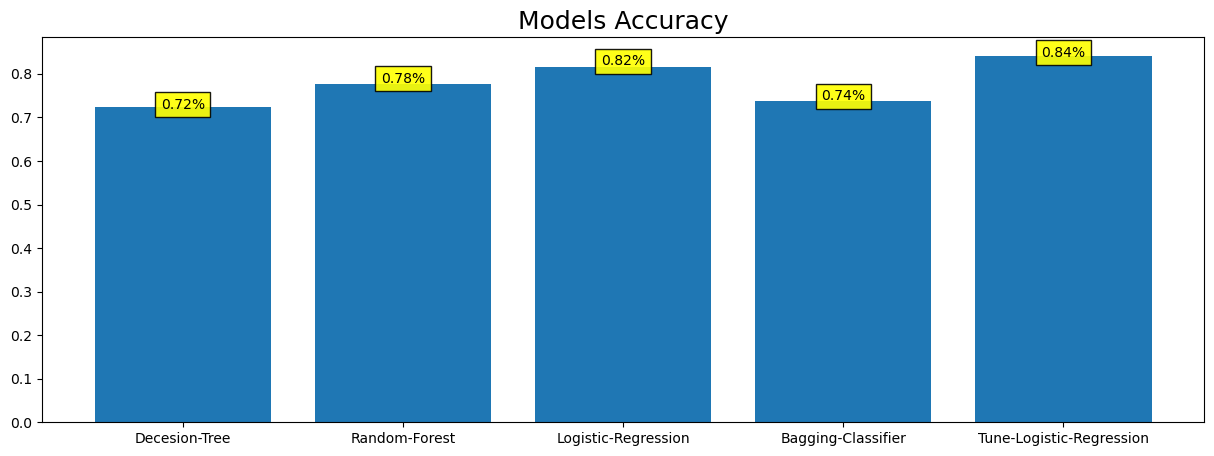

In [90]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
  for i in range(len(names)):
    plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

## **Save & Load Model**

In [91]:
grid_search.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [92]:
import pickle

# Save the pipeline as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)
print("Model Saved!")

Model Saved!


In [93]:
import pickle

# Load the pipeline from the pickle file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model Loaded.")
# Make predictions using the loaded pipeline
y_pred = model.predict(X_test)

Model Loaded.


In [94]:
print(classification_report(y_pred, y_test, target_names=['no heart disease', 'heart disease']))

                  precision    recall  f1-score   support

no heart disease       0.95      0.79      0.86        48
   heart disease       0.72      0.93      0.81        28

        accuracy                           0.84        76
       macro avg       0.84      0.86      0.84        76
    weighted avg       0.87      0.84      0.84        76



## **Model Inference**

In [95]:
print(top_10_best_features)

['thalach' 'ca' 'oldpeak' 'thal' 'exang' 'chol' 'age' 'trestbps' 'cp'
 'restecg']


In [96]:
import pickle

# Load the scaler from the pickle file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the pipeline from the pickle file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model Loaded.")

Model Loaded.


In [97]:
print(top_10_best_features)

['thalach' 'ca' 'oldpeak' 'thal' 'exang' 'chol' 'age' 'trestbps' 'cp'
 'restecg']


In [98]:
def model_inference(input_data, scaler, model):
  res = model.predict(scaler.transform([input_data]))[0]
  if res == 0:
    print("No Heart Disease.")
  else:
    print("Heart Disease.")

In [99]:
input_arr = [118.,   1.,   1.,   3.,   1., 275.,  47., 110.,   4.,   2.]
model_inference(input_arr, scaler, model)

Heart Disease.


In [100]:
input_arr = [157. ,   0. ,   0.6,   3. ,   0. , 295. ,  51. , 120. ,   3. ,
         2. ]
model_inference(input_arr, scaler, model)

No Heart Disease.


In [101]:
df[top_10_best_features].iloc[253].values

array([157. ,   0. ,   0.6,   3. ,   0. , 295. ,  51. , 120. ,   3. ,
         2. ], dtype=float16)

In [ ]:
from flask import Flask, request, render_template
import pickle

# Load the scaler from the pickle file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the pipeline from the pickle file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model Loaded.")

def model_inference(input_data, scaler, model):
  res = model.predict(scaler.transform([input_data]))[0]
  if res == 0:
    print("No Heart Disease.")
    return "No Heart Disease"
  else:
    print("Heart Disease.")
    return "Heart Disease"


app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    prediction = None
    prediction_title = ""
    prediction_message = ""
    prediction_color = ""
    if request.method == 'POST':
        thalach = int(request.form['thalach'])
        ca = int(request.form['ca'])
        oldpeak = float(request.form['oldpeak'])
        thal = int(request.form['thal'])
        exang = int(request.form['exang'])
        chol = int(request.form['chol'])
        age = int(request.form['age'])
        trestbps = int(request.form['trestbps'])
        cp = int(request.form['cp'])
        restecg = int(request.form['restecg'])
        
        
        input_arr = [thalach, ca, oldpeak, thal,
                     exang, chol, age, trestbps, cp, restecg]
        prediction = model_inference(input_arr, scaler, model)
        # set the prediction message and color based on the prediction result
        if prediction == 'Heart Disease':
            prediction_title = "Heart Disease Detected"
            prediction_message = f"The prediction for the input features suggests the presence of heart disease."
            prediction_color = "danger"
        else:
            prediction_title = "No Heart Disease Detected"
            prediction_message = f"The prediction for the input features indicates no heart disease detected."
            prediction_color = "success"

        # render the index.html template with the prediction result
    return render_template('index.html', prediction=prediction, prediction_title=prediction_title,
                           prediction_message=prediction_message, prediction_color=prediction_color)

if __name__ == '__main__':
    app.run()
    




Model Loaded.
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
